## ATAC multiome only analysis

## MFI, trophoblast only, with peak calling based on true labels coming from RNA annotation of multiome

### Dimensionality reduction with cisTopic for single samples from cellatac

01.2022

In [147]:
import numpy as np
import scanpy as sc 
import pandas as pd
import anndata
sc.settings.set_figure_params(dpi=80)

**r2py setup**

In [148]:
# did 'pip install rpy2==3.4.2' to avoid errors in R later to do with matrices
import rpy2.rinterface_lib.callbacks
import logging

In [149]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
#rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [150]:
import anndata2ri # needs 'pip install anndata2ri'
anndata2ri.activate()

In [151]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R

BiocManager::install("Signac")

R[write to console]: Bioconductor version 3.12 (BiocManager 1.30.16), R 4.0.4 (2021-02-15)

R[write to console]: Installing package(s) 'Signac'

R[write to console]: also installing the dependencies 'tweenr', 'sparsesvd', 'docopt', 'ggseqlogo', 'fastmatch', 'RcppRoll', 'ggforce', 'qlcMatrix'


R[write to console]: trying URL 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/tweenr_1.0.2.tar.gz'

R[write to console]: Content type 'binary/octet-stream'
R[write to console]:  length 569726 bytes (556 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

Update all/some/none? [a/s/n]: 

 a


R[write to console]: also installing the dependency 'MatrixExtra'


R[write to console]: trying URL 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/MatrixExtra_0.1.9-1.tar.gz'

R[write to console]: Content type 'binary/octet-stream'
R[write to console]:  length 219018 bytes (213 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

In [13]:
%%R

install.packages('Seurat')

R[write to console]: Installing package into '/home/jovyan/R/x86_64-pc-linux-gnu-library/4.0'
(as 'lib' is unspecified)

R[write to console]: trying URL 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/Seurat_4.0.6.tar.gz'

R[write to console]: Content type 'binary/octet-stream'
R[write to console]:  length 1454271 bytes (1.4 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

In [50]:
%%R

# necessary for GenomeInfoDb - this I understood once I tried to do devtools::install_github("https://github.com/Bioconductor/GenomeInfoDb/") in command line R and 
# it explicitly complained about needing an update for this BiocGenerics package
devtools::install_github("https://github.com/Bioconductor/BiocGenerics/")

R[write to console]: Downloading GitHub repo Bioconductor/BiocGenerics@HEAD



✔  checking for file ‘/tmp/Rtmp6qAHIK/remotes6faa27dbb43f/Bioconductor-BiocGenerics-1272791/DESCRIPTION’ (4.4s)
─  preparing ‘BiocGenerics’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘BiocGenerics_0.41.2.tar.gz’
   


R[write to console]: Installing package into '/home/jovyan/R/x86_64-pc-linux-gnu-library/4.0'
(as 'lib' is unspecified)



In [473]:
%%R

#BiocManager::install("GenomeInfoDb")
# had to install a newer version of ... since was having this issue in the very last command (peaks_gr <- annotate_gr(peaks_gr, EnsDb.genome, blacklist_gr)):
# https://github.com/Bioconductor/GenomeInfoDb/issues/30
devtools::install_github("https://github.com/Bioconductor/GenomeInfoDb/")
 
# because of errors 
#devtools::install_github("https://github.com/Bioconductor/GenomeInfoDb/tree/RELEASE_3_12")

    

R[write to console]: Downloading GitHub repo Bioconductor/GenomeInfoDb@HEAD



✔  checking for file ‘/tmp/Rtmp6qAHIK/remotes6faa754cf821/Bioconductor-GenomeInfoDb-d4604b1/DESCRIPTION’ (3.9s)
─  preparing ‘GenomeInfoDb’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘GenomeInfoDb_1.31.1.tar.gz’
   


R[write to console]: Installing package into '/home/jovyan/R/x86_64-pc-linux-gnu-library/4.0'
(as 'lib' is unspecified)



In [6]:
%%R
# necessary to successfully load the cistopic library
install.packages("ellipsis", version = "0.3.2")

R[write to console]: Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/ellipsis_0.3.2.tar.gz'

R[write to console]: Content type 'binary/octet-stream'
R[write to console]:  length 8130 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [8]:
%%R

devtools::install_github("aertslab/cisTopic", force=TRUE)


R[write to console]: Downloading GitHub repo aertslab/cisTopic@HEAD



These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

 1: All                                           
 2: CRAN packages only                            
 3: None                                          
 4: formatR      (1.8        -> 1.11      ) [CRAN]
 5: matrixStats  (0.58.0     -> 0.61.0    ) [CRAN]
 6: bitops       (1.0-6      -> 1.0-7     ) [CRAN]
 7: RCurl        (1.98-1.3   -> 1.98-1.5  ) [CRAN]
 8: crayon       (1.4.1      -> 1.4.2     ) [CRAN]
 9: snow         (0.4-3      -> 0.4-4     ) [CRAN]
10: GenomeInfoDb (1.26.4     -> 1.26.7    ) [CRAN]
11: BiocGenerics (0.36.0     -> 0.36.1    ) [CRAN]
12: glue         (1.4.2      -> 1.5.0     ) [CRAN]
13: vctrs        (0.3.6      -> 0.3.8     ) [CRAN]
14: rlang        (0.4.10     -> 0.4.12    ) [CRAN]
15: lifecycle    (1.0.0      -> 1.0.1     ) [CRAN]
16: ellipsis     (0.3.1      -> 0.3.2     ) [CRAN]
17: colorspace   (2.0-0      -> 2.0-2     ) [CRAN]
18: vir

Enter one or more numbers, or an empty line to skip updates: 1


formatR      (1.8        -> 1.11      ) [CRAN]
matrixStats  (0.58.0     -> 0.61.0    ) [CRAN]
bitops       (1.0-6      -> 1.0-7     ) [CRAN]
RCurl        (1.98-1.3   -> 1.98-1.5  ) [CRAN]
crayon       (1.4.1      -> 1.4.2     ) [CRAN]
snow         (0.4-3      -> 0.4-4     ) [CRAN]
GenomeInfoDb (1.26.4     -> 1.26.7    ) [CRAN]
BiocGenerics (0.36.0     -> 0.36.1    ) [CRAN]
glue         (1.4.2      -> 1.5.0     ) [CRAN]
vctrs        (0.3.6      -> 0.3.8     ) [CRAN]
rlang        (0.4.10     -> 0.4.12    ) [CRAN]
lifecycle    (1.0.0      -> 1.0.1     ) [CRAN]
ellipsis     (0.3.1      -> 0.3.2     ) [CRAN]
colorspace   (2.0-0      -> 2.0-2     ) [CRAN]
viridisLite  (0.3.0      -> 0.4.0     ) [CRAN]
R6           (2.5.0      -> 2.5.1     ) [CRAN]
utf8         (1.2.1      -> 1.2.2     ) [CRAN]
cli          (2.3.1      -> 3.1.0     ) [CRAN]
pillar       (1.5.1      -> 1.6.4     ) [CRAN]
fansi        (0.4.2      -> 0.5.0     ) [CRAN]
hms          (1.0.0      -> 1.1.1     ) [CRAN]
tibble       

R[write to console]: Installing 66 packages: formatR, matrixStats, bitops, RCurl, crayon, snow, GenomeInfoDb, BiocGenerics, glue, vctrs, rlang, lifecycle, ellipsis, colorspace, viridisLite, R6, utf8, cli, pillar, fansi, hms, tibble, Rcpp, blob, openssl, curl, digest, jquerylib, sass, RSQLite, cachem, bslib, withr, later, htmltools, fontawesome, mime, httpuv, segmented, XML, graph, shiny, R.utils, GSEABase, data.table, RcppArmadillo, lgr, RhpcBLASctl, float, isoband, AUCell, crosstalk, htmlwidgets, tidyselect, generics, mlapi, stringi, rsparse, ggplot2, RcisTarget, fitdistrplus, DT, dplyr, doSNOW, text2vec, lda

R[write to console]: Installing packages into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/formatR_1.11.tar.gz'

R[write to console]: Content type 'binary/octet-stream'
R[write to console]:  length 94843 bytes (92 KB)

R[write to console]: =
R

✔  checking for file ‘/tmp/RtmpTWF4GR/remotes16165a2665c/aertslab-cisTopic-04cecbb/DESCRIPTION’ ...
─  preparing ‘cisTopic’:
✔  checking DESCRIPTION meta-information ...
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘cisTopic_0.3.0.tar.gz’
   


R[write to console]: Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [10]:
%%R

BiocManager::install("ensembldb")

R[write to console]: Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.4 (2021-02-15)

R[write to console]: Installing package(s) 'ensembldb'

R[write to console]: also installing the dependencies ‘AnnotationFilter’, ‘ProtGenerics’


R[write to console]: trying URL 'https://bioconductor.org/packages/3.12/bioc/src/contrib/AnnotationFilter_1.14.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 312329 bytes (305 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

Update all/some/none? [a/s/n]: 

 1


Update all/some/none? [a/s/n]: 

 a


R[write to console]: also installing the dependencies ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘gower’, ‘ipred’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘wk’, ‘ids’, ‘caret’, ‘shinyjs’, ‘terra’, ‘vroom’, ‘tzdb’, ‘here’, ‘Matrix’, ‘s2’, ‘dtplyr’, ‘googledrive’, ‘googlesheets4’


R[write to console]: trying URL 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/progressr_0.9.0.tar.gz'

R[write to console]: Content type 'binary/octet-stream'
R[write to console]:  length 106817 bytes (104 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [15]:
%%R

BiocManager::install("BSgenome.Hsapiens.UCSC.hg38") # and updating all packages - takes a while

R[write to console]: Bioconductor version 3.12 (BiocManager 1.30.16), R 4.0.4 (2021-02-15)

R[write to console]: Installing package(s) 'BSgenome.Hsapiens.UCSC.hg38'

R[write to console]: also installing the dependency 'BSgenome'


R[write to console]: trying URL 'https://bioconductor.org/packages/3.12/bioc/src/contrib/BSgenome_1.58.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 6076433 bytes (5.8 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

Update all/some/none? [a/s/n]: 

 a


R[write to console]: trying URL 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/hdf5r_1.3.5.tar.gz'

R[write to console]: Content type 'binary/octet-stream'
R[write to console]:  length 2218916 bytes (2.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [17]:
%%R

BiocManager::install("EnsDb.Hsapiens.v86")

R[write to console]: Bioconductor version 3.12 (BiocManager 1.30.16), R 4.0.4 (2021-02-15)

R[write to console]: Installing package(s) 'EnsDb.Hsapiens.v86'

R[write to console]: trying URL 'https://bioconductor.org/packages/3.12/data/annotation/src/contrib/EnsDb.Hsapiens.v86_2.99.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 78178992 bytes (74.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


Update all/some/none? [a/s/n]: 

 a


R[write to console]: trying URL 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/hdf5r_1.3.5.tar.gz'

R[write to console]: Content type 'binary/octet-stream'
R[write to console]:  length 2218916 bytes (2.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [152]:
%%R

.libPaths()

[1] "/home/jovyan/R/x86_64-pc-linux-gnu-library/4.0"
[2] "/usr/local/lib/R/site-library"                 
[3] "/usr/lib/R/site-library"                       
[4] "/usr/lib/R/library"                            


In [153]:
%%R
## Install dependencies
#devtools::install_github("aertslab/RcisTarget")
#devtools::install_github("aertslab/AUCell")
        
#devtools::install_github("aertslab/cisTopic")
library(cisTopic)
library(Matrix)
library(GenomicRanges)
library(ensembldb)
library(EnsDb.Hsapiens.v86)
library(tidyr)
library(Signac)
#library(cicero)

library(Matrix)
library(reticulate)
#if (!requireNamespace("remotes", quietly = TRUE)) {
#  install.packages("remotes")
#}
#remotes::install_github("mojaveazure/seurat-disk")

#library(SeuratDisk)
library(Seurat)
library(GenomeInfoDb)
library(BSgenome.Hsapiens.UCSC.hg38) # needs 'BiocManager::install("BSgenome.Hsapiens.UCSC.hg38")'
library(ensembldb)
#library(JASPAR2018)
#library(TFBSTools)
library(patchwork)
#library(universalmotif)
#library(MotifDb)
#library(chromVAR)
#library(motifmatchr)

In [154]:
%%R

sessionInfo()

R version 4.0.4 (2021-02-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] bigmemory_4.5.36                  patchwork_1.1.1                  
 [3] BSgenome.Hsapiens.UCSC.hg38_1.4.3 BSgenome_1.58.0                  
 [5] rtracklayer_1.50.0                Biostrings_2.58.0                
 [7] XVector_0.30.0                    SeuratObject_4.0.4               
 [9] Seurat_4.0.

In [155]:
%%R 

writeLines(capture.output(sessionInfo()), "./sessionInfo_troph_only_multiome_only_custom_clust_peak_calling.txt")

**Load data**

In [156]:
# Define variables

cellatac_outdir = '/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/trophoblast_only_analysis/results200k_customcls4/'
outdir = '/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/trophoblast_only_analysis/downstream_analysis_custom_clust/'
experiment_prefix = 'multiome_only_MFI_trophoblast_only_peak_calling_w_custom_clusters'


In [157]:
# with peak calling based on multiome (custom) clusters
adata = sc.read_h5ad(outdir + experiment_prefix + '_ATAC_raw.h5ad')

In [158]:
adata

AnnData object with n_obs × n_vars = 7449 × 42558
    obs: 'cellatac_code', 'sample', 'barcode', 'donor', 'annot_multiome_combined', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'binary_raw'

**Setup of cisTopic**

In [159]:
# Remove empty rows
bool_matrix = adata.X.sum(0) > 0
bool_vector = np.squeeze(np.asarray(bool_matrix))
adata = adata[:, bool_vector]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [160]:
adata

View of AnnData object with n_obs × n_vars = 7449 × 42558
    obs: 'cellatac_code', 'sample', 'barcode', 'donor', 'annot_multiome_combined', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'binary_raw'

**Assess if there are cells with very low number of counts**

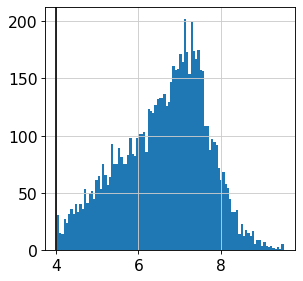

In [161]:
import matplotlib.pyplot as plt
plt.hist(adata.obs['log1p_total_counts'], bins=100);
plt.axvline(x=4, color="black")

**Convert anndata to SingleCellExperiment**

In [162]:
adata.var.index

Index(['chr1:904345-904907', 'chr1:938156-938411', 'chr1:959000-959712',
       'chr1:966208-966555', 'chr1:966847-967127', 'chr1:975929-976561',
       'chr1:999901-1000393', 'chr1:1000739-1000971', 'chr1:1006456-1006715',
       'chr1:1013031-1013734',
       ...
       'chrX:154719165-154719708', 'chrX:154748779-154749228',
       'chrX:154762329-154763078', 'chrX:154785520-154785997',
       'chrX:154805075-154805684', 'chrX:154805785-154806070',
       'chrX:155026470-155027451', 'chrX:155070780-155071828',
       'chrX:155215852-155216966', 'chrX:155880939-155881650'],
      dtype='object', name='peak_id', length=42558)

In [164]:
# SingleCellExperiment is being difficult, let's go through a file route
with open(outdir + 'regions_for_cisTopic.txt',
          'w') as f:
    for item in list(adata.var.index):
        f.write("%s\n" % item)

In [165]:
with open(outdir + 'barcodes_for_cisTopic.txt', 
          'w') as f:
    for item in list(adata.obs.index):
        f.write("%s\n" % item)

In [166]:
mtx_dense = adata.X.T.toarray()

In [167]:
mtx_dense.shape

(42558, 7449)

In [168]:
%%time
# binarised mtx_dense
mat = np.matrix(mtx_dense)

with open(outdir + 'peak_bc_matrix_filtered_for_cisTopic.txt', 
          'wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%.2f')

CPU times: user 1min 7s, sys: 3.4 s, total: 1min 11s
Wall time: 1min 27s


**Train cisTopic model**

In [169]:
%%time

%%R -i outdir

f_binary_mat <- read.csv(file = paste0(outdir, 'peak_bc_matrix_filtered_for_cisTopic.txt'),
                         sep = ' ', header = FALSE)
# f_binary_mat_sparse <- Matrix(f_binary_mat, sparse = TRUE)
# only selected peaks
regions.names = read.delim(paste0(outdir, 'regions_for_cisTopic.txt'),
                           header = FALSE, stringsAsFactors = FALSE)
cells.names = read.delim(paste0(outdir, 'barcodes_for_cisTopic.txt'), header = FALSE, stringsAsFactors = FALSE)


CPU times: user 1min 34s, sys: 5.16 s, total: 1min 39s
Wall time: 1min 41s


In [170]:
%%R

dim(f_binary_mat)

[1] 42558  7449


In [171]:
%%R

length(rownames(f_binary_mat))

[1] 42558


In [172]:
%%R

length(regions.names$V1)

[1] 42558


In [173]:
%%R

colnames(f_binary_mat) = cells.names$V1
rownames(f_binary_mat) = regions.names$V1


In [174]:
%%R

## Initialize object ##
cisTopicObject <- createcisTopicObject(f_binary_mat, project.name='ATAC_cisTopic')


In [175]:
outdir

'/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/trophoblast_only_analysis/downstream_analysis_custom_clust/'

In [176]:
%%R -i outdir -i experiment_prefix

# save to further read in on farm
saveRDS(cisTopicObject, paste0(outdir, experiment_prefix, 
                               "_initialized_cisTopic.RDS"))

In [177]:
outdir

'/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/trophoblast_only_analysis/downstream_analysis_custom_clust/'

Run cisTopic with farm resources as VM doesn't have enough CPU/memory

Doing this as per Valentina's scripts

In [178]:
%%R -i outdir -i experiment_prefix

# read in from file

cisTopicObject <- readRDS(paste0(outdir, experiment_prefix, 
                                "_initialized_cisTopic.RDS"))

In [179]:
%%time

%%R -i outdir -i experiment_prefix

# started roughly at 17:51 on 12.01.2022
# ran this here with smaller topics_vec since on farm was waiting for a job for about a week (!) and seems like optimum of topics is in this range anyway

topics_vec <- seq(40, 50, 2)
cisTopicObject <- runWarpLDAModels(cisTopicObject, topic = topics_vec, 
                                   seed = 1712, 
                                   nCores = 21, 
                                   iterations = 500
                                  )

saveRDS(cisTopicObject, paste0(outdir, experiment_prefix, 
                               "_ATAC.trainedCistopic_in_notebook_run.RDS"
                              ))

[1] "The number of cores (21) is higher than the number of models (6)."
[1] "Exporting data..."
[1] "Run models..."
CPU times: user 1min 46s, sys: 29.4 s, total: 2min 16s
Wall time: 11min 28s


In [180]:
%%R -i outdir -i experiment_prefix

# takes about 5 minutes

cisTopicObject <- readRDS(paste0(outdir, experiment_prefix, 
                                 "_ATAC.trainedCistopic_in_notebook_run.RDS"))

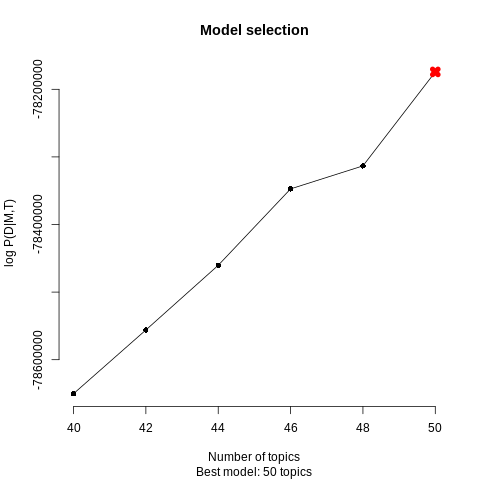

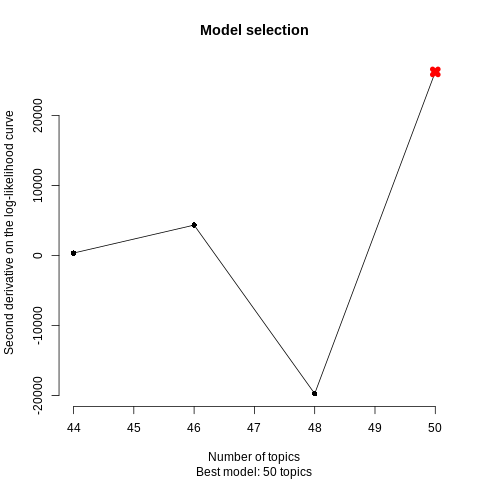

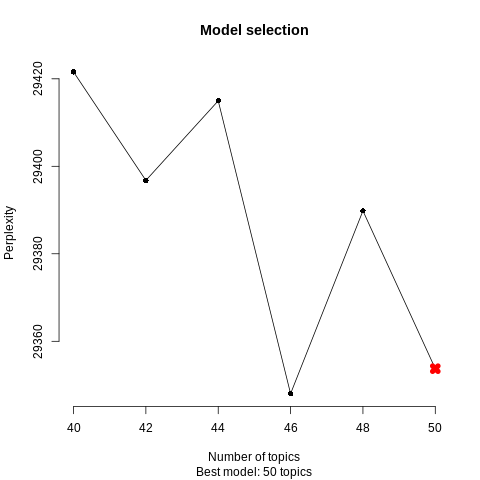

In [181]:
%%R

cistopic_model <- selectModel(cisTopicObject, type = "maximum")

In [182]:
%%R -o topicXcell
## Save topic matrix ##
topicXcell <- modelMatSelection(cistopic_model, 'cell', 'Probability')

dim(topicXcell)

[1]   50 7449


In [183]:
topicXcell

array([[0.03108515, 0.02392684, 0.00348837, ..., 0.00844648, 0.00741775,
        0.00900755],
       [0.01416729, 0.00470325, 0.00465116, ..., 0.0219009 , 0.00282433,
        0.03878101],
       [0.03771665, 0.039567  , 0.00620155, ..., 0.02112502, 0.00651769,
        0.00183387],
       ...,
       [0.00847777, 0.01243001, 0.00775194, ..., 0.01902663, 0.0182185 ,
        0.00809061],
       [0.03432555, 0.03064576, 0.04651163, ..., 0.02466937, 0.01139044,
        0.0214671 ],
       [0.00810098, 0.0051885 , 0.00542636, ..., 0.00728267, 0.00521415,
        0.00458468]])

In [184]:
adata.obsm['X_cistopic_50'] = topicXcell.T

**Visualize dimensionality reduction results**

In [185]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep="X_cistopic_50")

In [186]:
sc.tl.umap(adata, 
           #min_dist = 0.4, spread = 1.2
          )

In [187]:
adata

AnnData object with n_obs × n_vars = 7449 × 42558
    obs: 'cellatac_code', 'sample', 'barcode', 'donor', 'annot_multiome_combined', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'neighbors', 'umap'
    obsm: 'X_cistopic_50', 'X_umap'
    layers: 'binary_raw'
    obsp: 'distances', 'connectivities'

In [188]:
adata.uns['annot_multiome_combined_colors'] = ['#1f77b4',
 '#ff7f0e',
 '#279e68',
 'lightgrey',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#d62728',
 '#aec7e8']

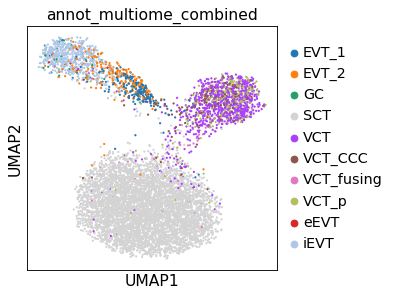

In [189]:
#adata.obs["cellatac_clusters"] = adata.obs["cellatac_clusters"].astype("category")
sc.pl.umap(adata, color =['annot_multiome_combined', 
                          #'cellatac_clusters'
                         ], 
           #frameon = False, size = 1, 
           #legend_loc = 'on data', legend_fontsize = 6
          )


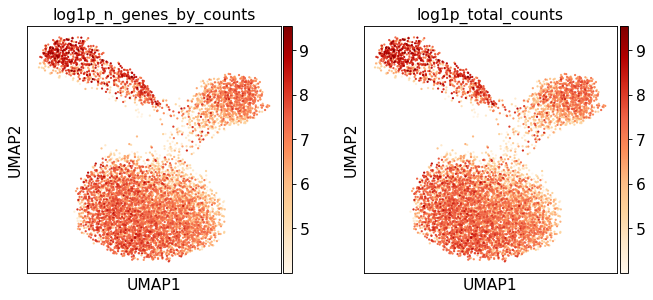

In [190]:
sc.pl.umap(adata, color = ['log1p_n_genes_by_counts', 'log1p_total_counts'], ncols = 2, color_map = "OrRd")

**Add metadata**

In [191]:
adata.obs['cellatac_code'] = [elem.split('-')[0] for elem in adata.obs_names]

In [192]:
# Sample from cellatac code 
sample_dictionary = {'01' : 'Pla_HDBR8015040', 
                     '02' : 'Pla_HDBR8642951',
                     '03' : 'Pla_HDBR8642952', 
                     '04' : 'Pla_HDBR8768488', 
                     '05' : 'Pla_HDBR8642950', 
                     '06' : 'Pla_HDBR10142863_and_37083_Pla_HDBR10084192', 
                     '07' : 'Pla_HDBR10142864_and_37083_Pla_HDBR10084193', 
                     '08' : 'Pla_HDBR10142865_and_37083_Pla_HDBR10084194', 
                     '09' : 'Pla_Camb10714918_and_40110_Pla_Camb10687914', 
                     '10' : 'Pla_Camb10714919_and_40110_Pla_Camb10687915', 
                     '11' : 'Pla_Camb10714920_and_40110_Pla_Camb10687916'}

adata.obs['sample'] = adata.obs['cellatac_code'].map(sample_dictionary) 
adata.obs['sample'].value_counts(dropna = False)

Pla_Camb10714920_and_40110_Pla_Camb10687916    3454
Pla_Camb10714919_and_40110_Pla_Camb10687915    3407
Pla_Camb10714918_and_40110_Pla_Camb10687914     450
Pla_HDBR10142863_and_37083_Pla_HDBR10084192      60
Pla_HDBR10142864_and_37083_Pla_HDBR10084193      43
Pla_HDBR10142865_and_37083_Pla_HDBR10084194      35
Name: sample, dtype: int64

... storing 'cellatac_code' as categorical
... storing 'sample' as categorical


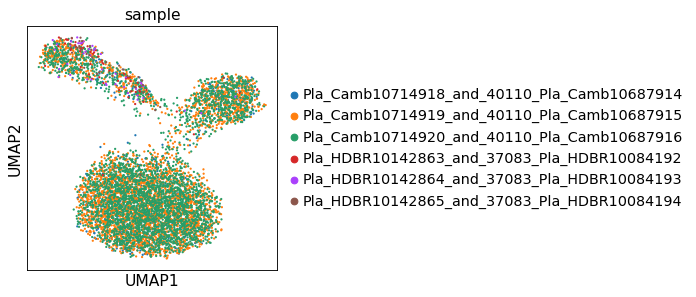

In [193]:
sc.pl.umap(adata, color = 'sample')

In [194]:
np.unique(adata.obs['sample'])

array(['Pla_Camb10714918_and_40110_Pla_Camb10687914',
       'Pla_Camb10714919_and_40110_Pla_Camb10687915',
       'Pla_Camb10714920_and_40110_Pla_Camb10687916',
       'Pla_HDBR10142863_and_37083_Pla_HDBR10084192',
       'Pla_HDBR10142864_and_37083_Pla_HDBR10084193',
       'Pla_HDBR10142865_and_37083_Pla_HDBR10084194'], dtype=object)

In [195]:
donor_dictionary = {'Pla_HDBR8015040' : '11', 
                      'Pla_HDBR8642950' : '5',
                      'Pla_HDBR8642951' : '10', 
                      'Pla_HDBR8642952' : 'H2', 
                      'Pla_HDBR8768488' : 'H7_H9', 
                      'Pla_Camb10714918_and_40110_Pla_Camb10687914': 'P14',
                      'Pla_Camb10714919_and_40110_Pla_Camb10687915': 'P13',
                      'Pla_Camb10714920_and_40110_Pla_Camb10687916': 'P13',
                      'Pla_HDBR10142863_and_37083_Pla_HDBR10084192': 'Hrv43',
                      'Pla_HDBR10142864_and_37083_Pla_HDBR10084193': 'Hrv43',
                      'Pla_HDBR10142865_and_37083_Pla_HDBR10084194': 'Hrv43',
                     }
adata.obs['donor'] = adata.obs['sample'].map(donor_dictionary)
adata.obs['donor'].value_counts(dropna = False)

P13      6861
P14       450
Hrv43     138
Name: donor, dtype: int64

In [196]:
stage_dictionary = {'Pla_HDBR8015040' : '4_PCW', 
                      'Pla_HDBR8642950' : '10_PCW',
                      'Pla_HDBR8642951' : '7_PCS', 
                      'Pla_HDBR8642952' : '12_PCW', 
                      'Pla_HDBR8768488' : '12-13_PCW', 
                      'Pla_Camb10714918_and_40110_Pla_Camb10687914': '8_PCW',
                      'Pla_Camb10714919_and_40110_Pla_Camb10687915': '8-9_PCW',
                      'Pla_Camb10714920_and_40110_Pla_Camb10687916': '8-9_PCW',
                      'Pla_HDBR10142863_and_37083_Pla_HDBR10084192': '6_PCW',
                      'Pla_HDBR10142864_and_37083_Pla_HDBR10084193': '6_PCW',
                      'Pla_HDBR10142865_and_37083_Pla_HDBR10084194': '6_PCW',
                   }
adata.obs['age'] = adata.obs['sample'].map(stage_dictionary)
adata.obs['age'].value_counts(dropna = False)

8-9_PCW    6861
8_PCW       450
6_PCW       138
Name: age, dtype: int64

In [197]:
tissue_dictionary = {'Pla_HDBR8015040' : 'placenta', 
                      'Pla_HDBR8642950' : 'placenta',
                      'Pla_HDBR8642951' : 'placenta', 
                      'Pla_HDBR8642952' : 'decidua_basalis', 
                      'Pla_HDBR8768488' : 'decidua_basalis', 
                      'Pla_Camb10714918_and_40110_Pla_Camb10687914': 'decidua_basalis_and_myometrium',
                      'Pla_Camb10714919_and_40110_Pla_Camb10687915': 'decidua_basalis_placenta_and_myometrium',
                      'Pla_Camb10714920_and_40110_Pla_Camb10687916': 'decidua_basalis_placenta_and_myometrium',
                      'Pla_HDBR10142863_and_37083_Pla_HDBR10084192': 'decidua_basalis',
                      'Pla_HDBR10142864_and_37083_Pla_HDBR10084193': 'decidua_basalis',
                      'Pla_HDBR10142865_and_37083_Pla_HDBR10084194': 'decidua_basalis',
                    }
adata.obs['tissue'] = adata.obs['sample'].map(tissue_dictionary)
adata.obs['tissue'].value_counts(dropna = False)

decidua_basalis_placenta_and_myometrium    6861
decidua_basalis_and_myometrium              450
decidua_basalis                             138
Name: tissue, dtype: int64

In [198]:
# add assay/technology key
adata.obs['technology'] = ['10X_multiome' if sample in ['Pla_Camb10714918_and_40110_Pla_Camb10687914',
                                                       'Pla_Camb10714919_and_40110_Pla_Camb10687915',
                                                       'Pla_Camb10714920_and_40110_Pla_Camb10687916',
                                                       'Pla_HDBR10142863_and_37083_Pla_HDBR10084192',
                                                       'Pla_HDBR10142864_and_37083_Pla_HDBR10084193',
                                                       'Pla_HDBR10142865_and_37083_Pla_HDBR10084194'] else '10X_snATAC-seq' for sample in adata.obs['sample']]

#### Plot metadata information

... storing 'donor' as categorical
... storing 'age' as categorical
... storing 'tissue' as categorical
... storing 'technology' as categorical


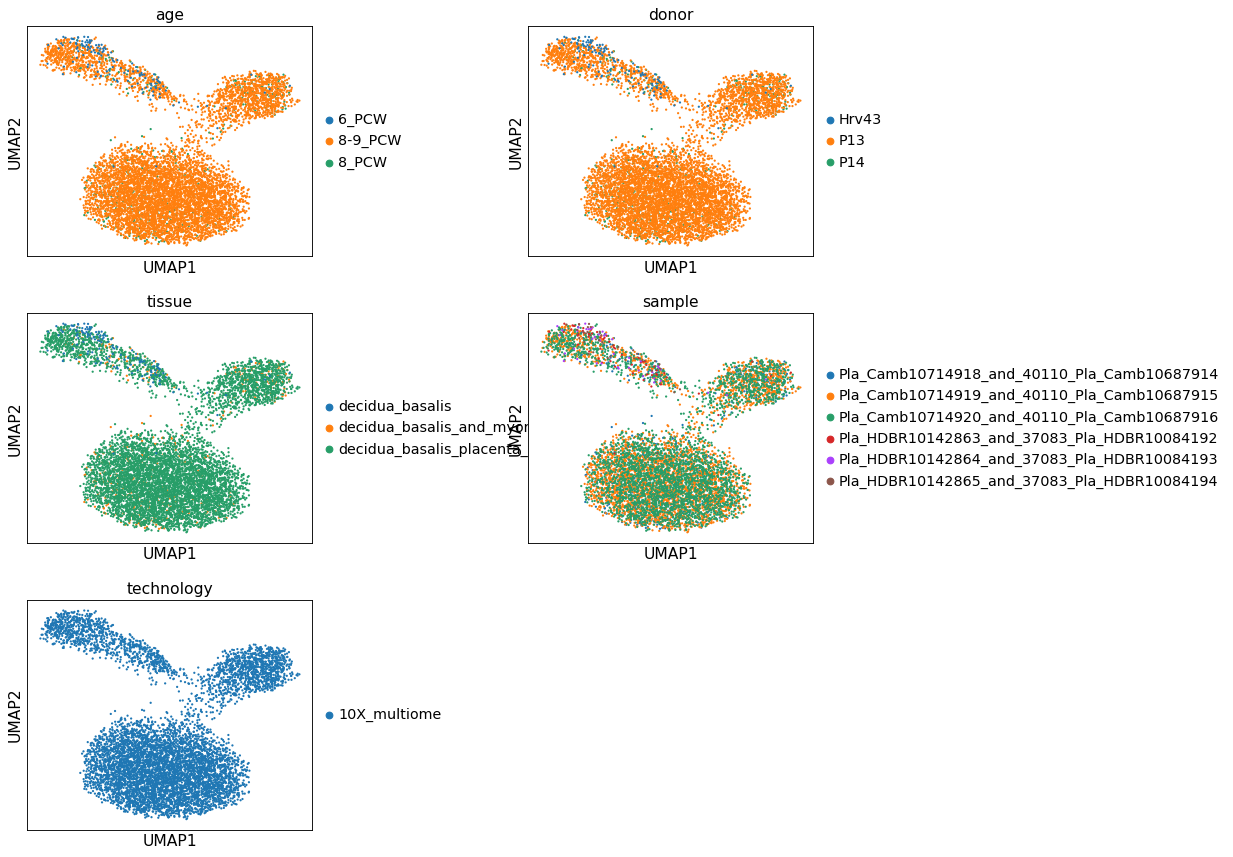

In [199]:
sc.pl.umap(adata, color = ['age', 'donor', 'tissue','sample','technology'], ncols = 2, wspace = 0.6)

In [200]:
outdir

'/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/trophoblast_only_analysis/downstream_analysis_custom_clust/'

#### De-noising the peak x cell matrix with cisTopic

The learnt LDA model from cisTopic can be used to generate a de-noised accessibility matrix. From the paper:

cisTopic calculates the predictive distribution, which describes the probability of each region in each cell, by multiplying the topic–cell and the region–topic distributions:
𝑃(𝑟𝑖|𝑐𝑗)=∑𝑘=1𝐾𝑃(𝑟𝑖|𝑇𝑘)𝑃(𝑇𝑘|𝑐𝑗)
 
where

 * 𝑃(𝑟𝑖|𝑐𝑗)  is the probability of region i in cell j,
 * 𝑃(𝑟𝑖|𝑇𝑘)  is the probability of region i in topic k, and
 * 𝑃(𝑇𝑘|𝑐𝑗)  is the probability of topic k in cell j.

In [201]:
%%R -o p_mat

library(bigmemory)
p_mat <- predictiveDistribution(cistopic_model, big.matrix=FALSE)

In [202]:
%%R
dim(p_mat)

[1] 42558  7449


In [203]:
p_mat

array([[8.34738280e-06, 1.47389852e-05, 1.52272428e-05, ...,
        1.29951120e-05, 1.43868213e-05, 1.02368534e-05],
       [8.69925061e-06, 5.74086890e-06, 7.12169846e-06, ...,
        3.49762805e-06, 2.48816725e-06, 4.73787655e-06],
       [2.64402299e-05, 3.26672172e-05, 4.02609179e-05, ...,
        2.35457740e-05, 2.24768063e-05, 2.01108479e-05],
       ...,
       [3.21842194e-05, 3.86667556e-05, 9.44299574e-05, ...,
        4.90276714e-05, 5.48803617e-05, 5.74962260e-05],
       [1.80518274e-05, 2.40128375e-05, 3.48298995e-05, ...,
        1.52702178e-05, 1.23569720e-05, 1.36082587e-05],
       [1.91479120e-05, 2.36621606e-05, 3.24754946e-05, ...,
        1.94082514e-05, 2.91938102e-05, 3.04838763e-05]])

#### Important: saving this `p_mat` denoised matrix for MOFA later

In [204]:
adata.layers["cistopic_p"] = p_mat.T

In [205]:
adata.layers["cistopic_p"].shape

(7449, 42558)

In [206]:
adata.layers["cistopic_p"]

array([[8.34738280e-06, 8.69925061e-06, 2.64402299e-05, ...,
        3.21842194e-05, 1.80518274e-05, 1.91479120e-05],
       [1.47389852e-05, 5.74086890e-06, 3.26672172e-05, ...,
        3.86667556e-05, 2.40128375e-05, 2.36621606e-05],
       [1.52272428e-05, 7.12169846e-06, 4.02609179e-05, ...,
        9.44299574e-05, 3.48298995e-05, 3.24754946e-05],
       ...,
       [1.29951120e-05, 3.49762805e-06, 2.35457740e-05, ...,
        4.90276714e-05, 1.52702178e-05, 1.94082514e-05],
       [1.43868213e-05, 2.48816725e-06, 2.24768063e-05, ...,
        5.48803617e-05, 1.23569720e-05, 2.91938102e-05],
       [1.02368534e-05, 4.73787655e-06, 2.01108479e-05, ...,
        5.74962260e-05, 1.36082587e-05, 3.04838763e-05]])

In [207]:
adata.X

<7449x42558 sparse matrix of type '<class 'numpy.float32'>'
	with 9026725 stored elements in Compressed Sparse Row format>

In [208]:
import scipy
adata_p_mat = anndata.AnnData(X = scipy.sparse.csr_matrix(adata.layers['cistopic_p']),
                              obs = adata.obs, 
                              var = adata.var)

In [209]:
outdir + experiment_prefix

'/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/trophoblast_only_analysis/downstream_analysis_custom_clust/multiome_only_MFI_trophoblast_only_peak_calling_w_custom_clusters'

In [210]:
adata_p_mat.write(outdir + experiment_prefix + '_with_p_mat_denoised_cisTopic_matrix_for_MOFA.h5ad')

#### Calculate de-noised gene scores

The de-noised accessibility signal can be used to calculate a gene-level accessibility scores (first implemented in Bravo Gonzales-Blas et al. 2020). This is very useful to check out accessibility of marker genes for example. From the paper:

we first multiply the region‐topic and topic‐cell distributions to obtain a region‐cell distribution, which indicates the probability of accessibility of each region in each cell. Then, for each gene, we aggregate the probabilities of the surrounding regions (in this case, 5 kb around the TSS plus introns), resulting in a gene activity score

At the moment there is no specific function in cisTopic to do this, but here is a simple implementation using functionality in GenomicRanges and Signac. Here I use peaks within a 5kb window of a gene (d parameter)

In [211]:
%%R 
library(GenomicRanges)
library(ensembldb)
library(EnsDb.Hsapiens.v86)
library(tidyr)
#library(Signac)

In [212]:
%%R

StringToGRanges <- function(regions, sep = c("-", "-"), ...) {
  ranges.df <- data.frame(ranges = regions)
  ranges.df <- separate(
    data = ranges.df,
    col = "ranges",
    sep = paste0(sep[[1]], "|", sep[[2]]),
    into = c("chr", "start", "end")
  )
  granges <- makeGRangesFromDataFrame(df = ranges.df, ...)
  return(granges)
}

GRangesToString <- function(grange, sep = c("-", "-")) {
  regions <- paste0(
    as.character(x = seqnames(x = grange)),
    sep[[1]],
    start(x = grange),
    sep[[2]],
    end(x = grange)
  )
  return(regions)
}

# Extend genomicRanges
# 
extend <- function(x, upstream=0, downstream=0)     
{
    if (any(strand(x) == "*"))
        warning("'*' ranges were treated as '+'")
    on_plus <- strand(x) == "+" | strand(x) == "*"
    new_start <- start(x) - ifelse(on_plus, upstream, downstream)
    new_end <- end(x) + ifelse(on_plus, downstream, upstream)
    ranges(x) <- IRanges(new_start, new_end)
    trim(x)
}


# Find peaks close to features of interest
#
# @param peaks_gr GenomicRanges object containing peaks
# @param features_gr GenomicRanges object containing features (e.g. genes)
# @param d distance to include peak, in bps (default 50000)
# @param feat_anno column in `features_gr@elementMetadata` containing annotation to name features (if NULL converts Granges to string)
#
# @return Sparse adjacency matrix indicating hits
peak2feature <- function(peaks_gr, features_gr, d=50000, feat_anno=NULL){
  GenomeInfoDb::seqlevelsStyle(features_gr) <- GenomeInfoDb::seqlevelsStyle(peaks_gr)
  #out <- seqlevelsStyle(peaks_gr)
  #seqlevelsStyle(features_gr) <- out
    
  ## Find peaks overlapping the search range around the features
  ext_gr <- extend(features_gr, upstream = d, downstream = d)
  ovs <- findOverlaps(peaks_gr, ext_gr)
  
  ## Define identifiers for peaks and features
  all_peaks <- GRangesToString(peaks_gr, sep = c(":", '-'))
  if (is.null(feat_anno)) {
    all_feats <- GRangesToString(features_gr, sep = c(":", '-'))
  } else {
    all_feats <- features_gr@elementMetadata[[feat_anno]]
  }
  
  ## Build adjacency matrix for hits
  print("Got to here")
  print(typeof(length(all_peaks)))
  print(typeof(length(all_feats)))
  adj_mat <- Matrix::Matrix(data=0, nrow = length(all_peaks), ncol=length(all_feats))
  for (i in unique(subjectHits(ovs))) {
    # if (length(adj_mat[queryHits(ovs[subjectHits(ovs)==i]),i]) > 0) {
    adj_mat[queryHits(ovs[subjectHits(ovs)==i]),i] <- 1
    # }
  }
  colnames(adj_mat) <- all_feats
  rownames(adj_mat) <- all_peaks
  
  adj_mat
  
}

In [213]:
adata.X

<7449x42558 sparse matrix of type '<class 'numpy.float32'>'
	with 9026725 stored elements in Compressed Sparse Row format>

In [214]:
%%R 
genes_gr <- genes(EnsDb.Hsapiens.v86)

In [215]:
# reading adata.X from a csv file as before
adata

AnnData object with n_obs × n_vars = 7449 × 42558
    obs: 'cellatac_code', 'sample', 'barcode', 'donor', 'annot_multiome_combined', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'age', 'tissue', 'technology'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'neighbors', 'umap', 'annot_multiome_combined_colors', 'sample_colors', 'age_colors', 'donor_colors', 'tissue_colors', 'technology_colors'
    obsm: 'X_cistopic_50', 'X_umap'
    layers: 'binary_raw', 'cistopic_p'
    obsp: 'distances', 'connectivities'

In [59]:
%%time

%%R -i outdir

f_binary_mat <- read.csv(file = paste0(outdir, 'peak_bc_matrix_filtered_for_cisTopic.txt'),
                         sep = ' ', header = FALSE)
# f_binary_mat_sparse <- Matrix(f_binary_mat, sparse = TRUE)
# only selected peaks
regions.names = read.delim(paste0(outdir, 'regions_for_cisTopic.txt'),
                           header = FALSE, stringsAsFactors = FALSE)
cells.names = read.delim(paste0(outdir, 'barcodes_for_cisTopic.txt'), header = FALSE, stringsAsFactors = FALSE)

CPU times: user 3min 20s, sys: 12.7 s, total: 3min 32s
Wall time: 3min 34s


In [216]:
%%R

dim(f_binary_mat)

[1] 42558  7449


In [217]:
%%R

colnames(f_binary_mat) = cells.names$V1
rownames(f_binary_mat) = regions.names$V1


In [218]:
%%R
peaks_gr <- StringToGRanges(rownames(f_binary_mat), sep=c(":", "-"))

In [219]:
%%R

head(genes_gr)

GRanges object with 6 ranges and 6 metadata columns:
                  seqnames      ranges strand |         gene_id   gene_name
                     <Rle>   <IRanges>  <Rle> |     <character> <character>
  ENSG00000223972        1 11869-14409      + | ENSG00000223972     DDX11L1
  ENSG00000227232        1 14404-29570      - | ENSG00000227232      WASH7P
  ENSG00000278267        1 17369-17436      - | ENSG00000278267   MIR6859-1
  ENSG00000243485        1 29554-31109      + | ENSG00000243485   MIR1302-2
  ENSG00000237613        1 34554-36081      - | ENSG00000237613     FAM138A
  ENSG00000268020        1 52473-53312      + | ENSG00000268020      OR4G4P
                            gene_biotype seq_coord_system      symbol
                             <character>      <character> <character>
  ENSG00000223972 transcribed_unproces..       chromosome     DDX11L1
  ENSG00000227232 unprocessed_pseudogene       chromosome      WASH7P
  ENSG00000278267                  miRNA       chromosome  

In [220]:
%%R

head(peaks_gr)

GRanges object with 6 ranges and 0 metadata columns:
      seqnames        ranges strand
         <Rle>     <IRanges>  <Rle>
  [1]     chr1 904345-904907      *
  [2]     chr1 938156-938411      *
  [3]     chr1 959000-959712      *
  [4]     chr1 966208-966555      *
  [5]     chr1 966847-967127      *
  [6]     chr1 975929-976561      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths


In [221]:
%%R

GenomeInfoDb::seqlevelsStyle(peaks_gr)

[1] "UCSC"


In [222]:
%%R

GenomeInfoDb::seqlevelsStyle(genes_gr)

[1] "NCBI"


In [223]:
%%R

unique(genome(genes_gr))

[1] "GRCh38"


In [224]:
%%R

unique(genome(peaks_gr))

[1] NA


In [225]:
%%R

Seqinfo(genome="hg38")

Seqinfo object with 640 sequences (1 circular) from hg38 genome:
  seqnames             seqlengths isCircular genome
  chr1                  248956422      FALSE   hg38
  chr2                  242193529      FALSE   hg38
  chr3                  198295559      FALSE   hg38
  chr4                  190214555      FALSE   hg38
  chr5                  181538259      FALSE   hg38
  ...                         ...        ...    ...
  chr22_KN196486v1_alt     153027      FALSE   hg38
  chr22_KQ458387v1_alt     155930      FALSE   hg38
  chr22_KQ458388v1_alt     174749      FALSE   hg38
  chr22_KQ759761v1_alt     145162      FALSE   hg38
  chrX_KV766199v1_alt      188004      FALSE   hg38


In [226]:
%%R

head(GenomeInfoDb::getChromInfoFromUCSC("hg38"))

  chrom      size assembled circular
1  chr1 248956422         1        0
2  chr2 242193529         1        0
3  chr3 198295559         1        0
4  chr4 190214555         1        0
5  chr5 181538259         1        0
6  chr6 170805979         1        0


In [227]:
%%R

head(GenomeInfoDb::getChromInfoFromNCBI("GRCh38"))

  SequenceName       SequenceRole AssignedMolecule GenBankAccn Relationship
1            1 assembled-molecule                1  CM000663.2            =
2            2 assembled-molecule                2  CM000664.2            =
3            3 assembled-molecule                3  CM000665.2            =
4            4 assembled-molecule                4  CM000666.2            =
5            5 assembled-molecule                5  CM000667.2            =
6            6 assembled-molecule                6  CM000668.2            =
    RefSeqAccn     AssemblyUnit SequenceLength UCSCStyleName circular
1 NC_000001.11 Primary Assembly      248956422          chr1        0
2 NC_000002.12 Primary Assembly      242193529          chr2        0
3 NC_000003.12 Primary Assembly      198295559          chr3        0
4 NC_000004.12 Primary Assembly      190214555          chr4        0
5 NC_000005.10 Primary Assembly      181538259          chr5        0
6 NC_000006.12 Primary Assembly      170805979  

In [228]:
%%R
seqlevelsStyle(genes_gr)

[1] "NCBI"


In [229]:
%%R
seqlevelsStyle(peaks_gr)

[1] "UCSC"


In [230]:
%%R -o adj_mat
## Compute peak2gene adjacency matrix
adj_mat <- peak2feature(peaks_gr, genes_gr, feat_anno = "gene_id", d=5000)

[1] "Got to here"
[1] "integer"
[1] "integer"


In [231]:
%%R

dim(adj_mat)

[1] 42558 63970


In [232]:
%%R

head(rownames(adj_mat))

[1] "chr1:904345-904907" "chr1:938156-938411" "chr1:959000-959712"
[4] "chr1:966208-966555" "chr1:966847-967127" "chr1:975929-976561"


In [233]:
%%R

length(rownames(adj_mat))

[1] 42558


In [234]:
%%R

colnames(adj_mat)[1:5]

[1] "ENSG00000223972" "ENSG00000227232" "ENSG00000278267" "ENSG00000243485"
[5] "ENSG00000237613"


In [235]:
%%R -o adj_mat

# Filter genes with at least 3 peaks in the proximity - Valentina's threshold
# trying at least 2 peaks

keep.genes <- which(colSums(adj_mat) > 2) 
adj_mat <- t(adj_mat[,keep.genes])

In [236]:
%%R

dim(adj_mat)

[1]  6456 42558


In [237]:
%%R

genes <- rownames(adj_mat)

In [238]:
%%R

head(genes)

[1] "ENSG00000187961" "ENSG00000187583" "ENSG00000187608" "ENSG00000188157"
[5] "LRG_198"         "ENSG00000217801"


In [239]:
%%R -o gene_var
head(rownames(adj_mat))
genes <- rownames(adj_mat)
gene_var <- genes_gr[genes,]@elementMetadata[c("gene_id","gene_name")]

In [240]:
%%R

head(rownames(adj_mat))

[1] "ENSG00000187961" "ENSG00000187583" "ENSG00000187608" "ENSG00000188157"
[5] "LRG_198"         "ENSG00000217801"


In [241]:
%%R

head(gene_var)

          gene_id     gene_name
0 ENSG00000187961        KLHL17
1 ENSG00000187583       PLEKHN1
2 ENSG00000187608         ISG15
3 ENSG00000188157          AGRN
4         LRG_198          AGRN
5 ENSG00000217801 RP11-465B22.3


### Alternative implementation of dot product between *adj_mat* and *p_mat*

In [242]:
print(np.__version__)

1.20.1


In [243]:
import math

#### adj_mat

In [244]:
rows_adj_mat = adj_mat.shape[0]
print(rows_adj_mat)
cols_adj_mat = adj_mat.shape[1]
print(cols_adj_mat)

6456
42558


In [245]:
a1 = adj_mat[0:math.ceil(rows_adj_mat/2), 0:math.ceil(cols_adj_mat/2)]
a2 = adj_mat[0:math.ceil(rows_adj_mat/2), math.ceil(cols_adj_mat/2):]
a3 = adj_mat[math.ceil(rows_adj_mat/2):, 0:math.ceil(cols_adj_mat/2)]
a4 = adj_mat[math.ceil(rows_adj_mat/2):, math.ceil(cols_adj_mat/2):]

In [246]:
print("a1 : {}\na2 : {}\na3 : {}\na4 : {}".format(a1.shape, a2.shape, a3.shape, a4.shape))

a1 : (3228, 21279)
a2 : (3228, 21279)
a3 : (3228, 21279)
a4 : (3228, 21279)


#### p_mat

In [247]:
rows_p_mat = p_mat.shape[0]
print(rows_p_mat)
cols_p_mat = p_mat.shape[1]
print(cols_p_mat)

42558
7449


In [248]:
b1 = p_mat[0:math.ceil(rows_p_mat/2), 0:math.ceil(cols_p_mat/2)]
b2 = p_mat[0:math.ceil(rows_p_mat/2), math.ceil(cols_p_mat/2):]
b3 = p_mat[math.ceil(rows_p_mat/2):, 0:math.ceil(cols_p_mat/2)]
b4 = p_mat[math.ceil(rows_p_mat/2):, math.ceil(cols_p_mat/2):]

In [249]:
print("b1 : {}\nb2 : {}\nb3 : {}\nb4 : {}".format(b1.shape, b2.shape, b3.shape, b4.shape))

b1 : (21279, 3725)
b2 : (21279, 3724)
b3 : (21279, 3725)
b4 : (21279, 3724)


#### Strassen matrix multiplication

In [250]:
c1 = np.add(a1.dot(b1), a2.dot(b3))

In [251]:
c1.shape

(3228, 3725)

In [252]:
c2 = np.add(a1.dot(b2), a2.dot(b4))

In [253]:
c2.shape

(3228, 3724)

In [254]:
c3 = np.add(a3.dot(b1), a4.dot(b3))

In [255]:
c3.shape

(3228, 3725)

In [256]:
c4 = np.add(a3.dot(b2), a4.dot(b4))

In [257]:
c4.shape

(3228, 3724)

In [258]:
c12 = np.concatenate((c1, c2), axis=1)

In [259]:
c12.shape

(3228, 7449)

In [260]:
c34 = np.concatenate((c3, c4), axis=1)

In [261]:
c34.shape

(3228, 7449)

In [262]:
gene_mat = np.concatenate((c12, c34), axis=0)

In [263]:
gene_mat.shape

(6456, 7449)

In [264]:
gene_mat

array([[5.17400177e-05, 5.49876348e-05, 5.92618966e-05, ...,
        4.54068518e-05, 4.56824918e-05, 3.72059243e-05],
       [3.75941618e-05, 4.13444361e-05, 4.61466010e-05, ...,
        3.89584239e-05, 4.21020880e-05, 2.70842175e-05],
       [1.27186429e-04, 1.23123710e-04, 7.50792373e-05, ...,
        1.87717507e-04, 2.07424187e-04, 1.90539753e-04],
       ...,
       [7.35318957e-05, 8.12695465e-05, 7.95432078e-05, ...,
        8.14172511e-05, 7.09864131e-05, 8.97324651e-05],
       [8.96075992e-05, 9.92909606e-05, 1.02723634e-04, ...,
        7.18878626e-05, 6.68313749e-05, 6.97160248e-05],
       [4.93538729e-05, 3.99090155e-05, 3.70849764e-05, ...,
        3.81630910e-05, 4.30170068e-05, 4.06675153e-05]])

Save another anndata object with the same .obs as the original one, but storing the gene score info.

In [265]:
%%R -i gene_mat -o predMatSumByGene

# Multiply and round predictive matrix to be able to integrate with scRNAseq data
predMatSumByGene <- round(gene_mat * 1000000)

In [266]:
gene_var = gene_var.set_index("gene_name")
gene_var.head()

,gene_id
gene_name,
KLHL17,ENSG00000187961
PLEKHN1,ENSG00000187583
ISG15,ENSG00000187608
AGRN,ENSG00000188157
AGRN,LRG_198


In [267]:
predMatSumByGene = predMatSumByGene.T
predMatSumByGene.shape

(7449, 6456)

In [268]:
gene_var

,gene_id
gene_name,
KLHL17,ENSG00000187961
PLEKHN1,ENSG00000187583
ISG15,ENSG00000187608
AGRN,ENSG00000188157
AGRN,LRG_198
...,...
FLNA,ENSG00000196924
RPL10,ENSG00000147403
DNASE1L1,ENSG00000013563


In [269]:
gene_adata = anndata.AnnData(X=predMatSumByGene, 
                             obs=adata.obs, 
                             var=gene_var
                            )
gene_adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 7449 × 6456
    obs: 'cellatac_code', 'sample', 'barcode', 'donor', 'annot_multiome_combined', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'age', 'tissue', 'technology'
    var: 'gene_id'

In [270]:
gene_adata.var_names_make_unique()

In [271]:
# Add cisTopic dimensionality reduction to match visualization 
gene_adata.obsm['X_cistopic_50'] = topicXcell.T

In [272]:
del adata.layers['cistopic_p']

In [273]:
adata

AnnData object with n_obs × n_vars = 7449 × 42558
    obs: 'cellatac_code', 'sample', 'barcode', 'donor', 'annot_multiome_combined', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'age', 'tissue', 'technology'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'neighbors', 'umap', 'annot_multiome_combined_colors', 'sample_colors', 'age_colors', 'donor_colors', 'tissue_colors', 'technology_colors'
    obsm: 'X_cistopic_50', 'X_umap'
    layers: 'binary_raw'
    obsp: 'distances', 'connectivities'

In [274]:
gene_adata

AnnData object with n_obs × n_vars = 7449 × 6456
    obs: 'cellatac_code', 'sample', 'barcode', 'donor', 'annot_multiome_combined', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'age', 'tissue', 'technology'
    var: 'gene_id'
    obsm: 'X_cistopic_50'

In [275]:
gene_adata.var

,gene_id
gene_name,
KLHL17,ENSG00000187961
PLEKHN1,ENSG00000187583
ISG15,ENSG00000187608
AGRN,ENSG00000188157
AGRN-1,LRG_198
...,...
FLNA,ENSG00000196924
RPL10,ENSG00000147403
DNASE1L1,ENSG00000013563


In [276]:
len(gene_adata.var.index)

6456

In [277]:
len(set(gene_adata.var.index))

6456

**Save anndata objects**

In [278]:
outdir + experiment_prefix

'/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/trophoblast_only_analysis/downstream_analysis_custom_clust/multiome_only_MFI_trophoblast_only_peak_calling_w_custom_clusters'

In [279]:
gene_adata.write(outdir + experiment_prefix + "_ATAC.geneScores.h5ad")

In [280]:
adata

AnnData object with n_obs × n_vars = 7449 × 42558
    obs: 'cellatac_code', 'sample', 'barcode', 'donor', 'annot_multiome_combined', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'age', 'tissue', 'technology'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'neighbors', 'umap', 'annot_multiome_combined_colors', 'sample_colors', 'age_colors', 'donor_colors', 'tissue_colors', 'technology_colors'
    obsm: 'X_cistopic_50', 'X_umap'
    layers: 'binary_raw'
    obsp: 'distances', 'connectivities'

In [281]:
adata.write(outdir + experiment_prefix + "_ATAC.wCisTopic.h5ad")

**Proceed with gene_data to look at marker genes**

In [282]:
sc.pp.neighbors(gene_adata, n_neighbors=15, use_rep="X_cistopic_50")

In [283]:
sc.tl.umap(gene_adata, #min_dist = 0.4, spread = 1.2
          )

**Plot markers per cell type from RNA-seq**

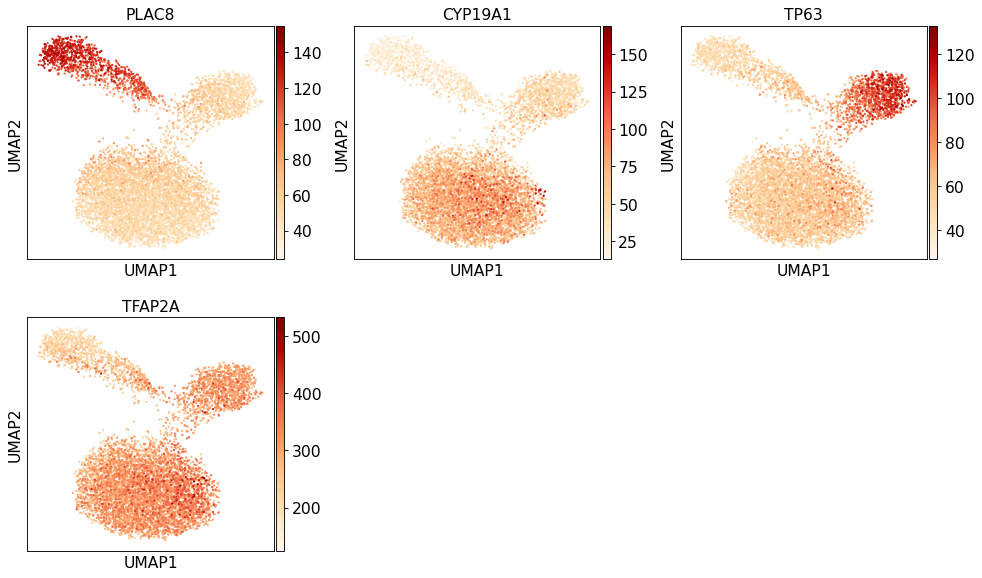

In [284]:
# Checking roughly where trophoblast are
sc.pl.umap(gene_adata, color = [#'HLA-G',
    'PLAC8',#'CSH1',
    #'NCAM1',
    'CYP19A1','TP63','TFAP2A',
    #'TFAP2C'
] , ncols = 3, color_map = 'OrRd')

In [285]:
gene_adata

AnnData object with n_obs × n_vars = 7449 × 6456
    obs: 'cellatac_code', 'sample', 'barcode', 'donor', 'annot_multiome_combined', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'age', 'tissue', 'technology'
    var: 'gene_id'
    uns: 'neighbors', 'umap'
    obsm: 'X_cistopic_50', 'X_umap'
    obsp: 'distances', 'connectivities'

In [286]:
gene_adata.write(outdir + experiment_prefix + "_ATAC.geneScores.h5ad")

#### End of notebook